# Breast Tissue 

In [1]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Installed version 0.2.0 of ehrapy is newer than the latest release 0.1.0! You are running a 
nightly version and features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00192/BreastTissue.xls -O breast_tissue.xls

File ‘breast_tissue.xls’ already there; not retrieving.


# Data Wrangling

In [4]:
data = pd.read_excel("breast_tissue.xls", sheet_name='Data')

Change attribute "Case #" to "patient_id"

In [5]:
data = data.rename(columns={"Case #": "patient_id"})

In [6]:
data.set_index("patient_id", inplace=True)

In [7]:
data.to_csv("breast_tissue_prepared.csv")

## ehrapy sanity check

In [8]:
adata = ep.io.read_csv("breast_tissue_prepared.csv",
                   index_column="patient_id")

In [9]:
ep.ad.type_overview(adata)

Variable names for AnnData object with 106 obs and 10 vars
╚══ 🔓 Unencoded variables
    ╠══ Class -> data type: string
    ╠══ I0 -> data type: floating
    ╠══ PA500 -> data type: floating
    ╠══ HFS -> data type: floating
    ╠══ DA -> data type: floating
    ╠══ Area -> data type: floating
    ╠══ A/DA -> data type: floating
    ╠══ Max IP -> data type: floating
    ╠══ DR -> data type: floating
    ╚══ P -> data type: floating

In [10]:
adata = ep.pp.encode(
    adata, encodings={"one_hot_encoding": ["Class"]}
)

Updating X and var ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100%

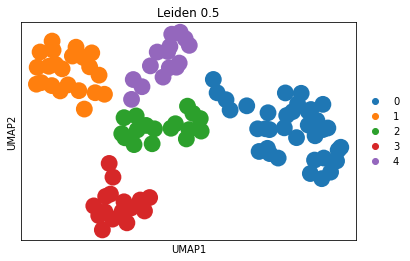

In [11]:
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

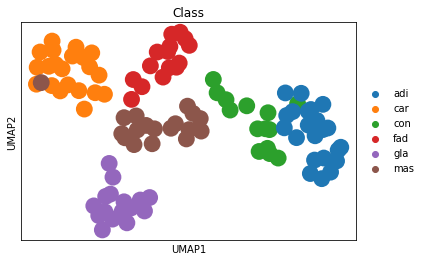

In [12]:
ep.pl.umap(adata, color=["Class"], ncols=1, wspace=0.75)